# Chapter 11: How to make predictions with a multiple regression model

In [1]:
import pandas as pd
import seaborn as sns

## The Cars dataset

In [2]:
carsData = pd.read_csv('cars.csv')

In [3]:
carsData.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
carsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# How to create a simple regression model

<AxesSubplot:>

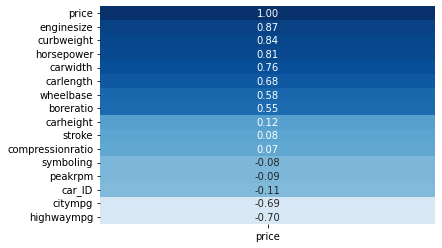

In [5]:
sns.heatmap(data=carsData.corr()[['price']].sort_values('price', ascending=False), 
            annot=True, cmap='Blues', vmin=-1.0, vmax=1.0, cbar=False, fmt='.2f')

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(
    carsData[['enginesize']], carsData[['price']],
    test_size=0.50, random_state=20)

model = LinearRegression()
model.fit(x_train, y_train)

model.score(x_test,y_test)

0.7664487643397885

In [13]:
model.score(x_train, y_train)

0.7519867514067815

In [ ]:
y_predicted = model.predict(x_test)

In [ ]:
# create DataFrame for the price predictions
predicted = pd.DataFrame(y_predicted, columns=['predictedPrice'])

# combine the test data and the predicted data into a frame
final = predicted.join([x_test.reset_index(drop=True), 
                        y_test.reset_index(drop=True)])
final[['enginesize','price','predictedPrice']].head()

## How to plot the residuals of a simple regression

In [ ]:
final['residual'] = final.price - final.predictedPrice
final.head(2)

In [ ]:
g = sns.relplot(data=final, x='enginesize', y='residual', kind='scatter')
for ax in g.axes.flat:
    ax.axhline(0, ls='--')

In [ ]:
sns.kdeplot(data=final, x='residual')

# How to create a multiple regression model

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    carsData[['enginesize','curbweight']], carsData[['price']], 
    test_size=0.20, random_state=20)

model = LinearRegression()
model.fit(x_train, y_train)

model.score(x_test, y_test)

In [ ]:
model.score(x_train, y_train)

In [ ]:
y_predicted = model.predict(x_test)

## How to prepare and plot the multiple regression

In [ ]:
# create the DataFrame for the price predictions
predicted = pd.DataFrame(y_predicted, columns=['predictedPrice'])

# combine the test data and the predicted data into a DataFrame
final = predicted.join([x_test.reset_index(drop=True), 
                        y_test.reset_index(drop=True)])
final.head()[['enginesize','curbweight','price','predictedPrice']]

## How to plot the residuals of a multiple regression

In [ ]:
final['residual'] = final.price - final.predictedPrice
final.head()

In [ ]:
sns.kdeplot(data=final, x='residual')

## How to identify categorical variables

In [ ]:
carsData.nunique()

## How to review categorical variables

### Dichotomous variables

In [ ]:
carsData.enginelocation.value_counts()

In [ ]:
carsData.fueltype.value_counts()

In [ ]:
carsData.aspiration.value_counts()

In [ ]:
carsData.doornumber.value_counts()

### Nominal variables

In [ ]:
carsData.fuelsystem.value_counts()

In [ ]:
carsData.carbody.value_counts()

In [ ]:
carsData.drivewheel.value_counts()

In [ ]:
carsData.enginetype.value_counts()

In [ ]:
carsData.cylindernumber.value_counts()

## How to create dummy variables

In [ ]:
catColumns = ['aspiration','doornumber','carbody','drivewheel']
dummies = pd.get_dummies(carsData[catColumns])
dummies.info()

In [ ]:
carsDummies = carsData.drop(columns=catColumns)
carsDummies = carsDummies.join(dummies)
carsDummies.info()

## How to rescale the data and check the correlations

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numCols = ['wheelbase','carlength','carwidth','carheight','curbweight',
           'enginesize','boreratio','stroke','compressionratio','horsepower',
           'peakrpm','citympg','highwaympg']
carsDummies[numCols] = scaler.fit_transform(carsDummies[numCols])
carsDummies.head()

In [ ]:
carsDummies.corr()[['price']].sort_values(by='price', ascending=False)

## How to create a multiple regression that includes dummy variables

In [ ]:
carsTrain, carsTest = train_test_split(carsDummies, test_size=0.2, 
    random_state=20)

In [ ]:
model = LinearRegression()
xCols = ['enginesize','horsepower','carwidth',
         'drivewheel_rwd','highwaympg']
model.fit(carsTrain[xCols], carsTrain['price'])

model.score(carsTest[xCols], carsTest['price'])

In [ ]:
model.score(carsTrain[xCols], carsTrain['price'])

In [ ]:
y_predicted = model.predict(carsTest[xCols])

In [ ]:
predicted = pd.DataFrame(y_predicted, columns=['predictedPrice'])

final = predicted.join([carsTest[xCols].reset_index(drop=True),
                        carsTest['price'].reset_index(drop=True)])

final[['enginesize','horsepower','carwidth','drivewheel_rwd',
       'highwaympg','price','predictedPrice']].head()

## How to select the independent variables

In [ ]:
# use Matplotlib to set the size of the plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))

# create the heatmap
sns.heatmap(carsTrain.corr()[['enginesize','curbweight','horsepower','carwidth',
                              'drivewheel_rwd','highwaympg','citympg','boreratio',
                              'price']].sort_values(by='price', ascending=False), 
            cmap='Blues', annot=True)

## How to test different combinations of variables

### An initial model that's fitted to eight independent variables

In [ ]:
model = LinearRegression()
xCols = ['enginesize','curbweight','horsepower','carwidth', 'carlength',
         'drivewheel_rwd','highwaympg','citympg']
model.fit(carsTrain[xCols], carsTrain['price'])
model.score(carsTest[xCols], carsTest['price'])

In [ ]:
model.score(carsTrain[xCols], carsTrain['price'])

### The initial model without the citympg column

In [ ]:
model = LinearRegression()
xCols = ['enginesize','curbweight','horsepower','carwidth','carlength',
         'drivewheel_rwd','highwaympg']
model.fit(carsTrain[xCols], carsTrain['price'])
model.score(carsTest[xCols], carsTest['price'])

In [ ]:
model.score(carsTrain[xCols], carsTrain['price'])

### A model that's fitted to all the numeric and dummy variables

In [ ]:
model = LinearRegression()
xCols = carsTrain.corr().drop(columns=['price']).columns.tolist()
model.fit(carsTrain[xCols], carsTrain['price'])
model.score(carsTest[xCols], carsTest['price'])

In [ ]:
model.score(carsTrain[xCols], carsTrain['price'])

## How to use SciKit learn to select the variables

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [ ]:
carsTrain, carsTest = train_test_split(carsDummies.drop(
    columns=['CarName','fueltype','enginelocation','cylindernumber',
             'fuelsystem','enginetype']), test_size=0.2, random_state=20)

In [ ]:
fs = SelectKBest(score_func=mutual_info_regression, k=20)
fs.fit(carsTrain.drop(columns=['price']), carsTrain['price'])

In [ ]:
x_train_fs = fs.transform(carsTrain.drop(columns=['price']))
x_test_fs = fs.transform(carsTest.drop(columns=['price']))

In [ ]:
model = LinearRegression()
model.fit(x_train_fs, carsTrain['price'])
model.score(x_test_fs, carsTest['price'])

In [ ]:
model.score(x_train_fs, carsTrain['price'])

In [ ]:
df1 = pd.DataFrame(carsTrain.drop(columns=['price']).columns, columns=['feature'])
df2 = pd.DataFrame(fs.scores_, columns=['importance'])
importance = df1.join(df2)
importance.sort_values('importance', ascending=False).head()

## How to select the right number of variables

In [ ]:
model = LinearRegression()
testScores = []
trainScores = []

for i in range(1, len(carsTrain.columns)):
    fs = SelectKBest(score_func=mutual_info_regression, k=i)
    fs.fit(carsTrain.drop(columns=['price']), carsTrain['price'])

    x_train_fs = fs.transform(carsTrain.drop(columns=['price']))
    x_test_fs = fs.transform(carsTest.drop(columns=['price']))

    model.fit(x_train_fs, carsTrain['price'])
    
    testScore = model.score(x_test_fs, carsTest['price'])
    trainScore = model.score(x_train_fs, carsTrain['price'])
    testScores.append(testScore)
    trainScores.append(trainScore)
    
df = pd.DataFrame(data={'testScores':testScores, 'trainScores':trainScores})
df.reset_index(inplace=True)
df.rename(columns={'index':'numFeatures'}, inplace=True)
df.numFeatures = df.numFeatures + 1
df.plot(x='numFeatures', y=['testScores','trainScores'])

In [ ]:
# Or, if you only want to plot the gap, you could do it like this...
df['gap'] = df['trainScores'] - df['testScores']
df.plot(x='numFeatures', y=['gap'])